In [23]:
import numpy as np
from konlpy.tag import Twitter
import codecs
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
%matplotlib inline
from PIL import Image
from wordcloud import WordCloud
from wordcloud import STOPWORDS
from wordcloud import ImageColorGenerator # 이미지에서 색 추출
from gensim.models import word2vec
from bayes import BayesianFilter

# 중요!!!!!!!!!!!!!!!!!!!!!!
- Module4

    -Part 02. 텍스트 분석
    
        01. 한국어 형태소 분석

In [2]:
# twitter 객체 생성
twitter = Twitter()

# pow 메소드로 형태소 분석(norm 옵션 : 단어 변환, stem 옵션 : 원형 단어 변환)
# nrom 옵션 : "그래욬ㅋㅋㅋ?" -> "그래요" 변환, stem 옵션 : "그렇다" 변환
malist = twitter.pos("아버지 가방에 들어가신다.", norm = True, stem = True)
print(malist)

C:\ProgramData\Anaconda3\envs\mypython\lib\site-packages\konlpy\tag\_okt.py:16: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')
C:\ProgramData\Anaconda3\envs\mypython\lib\site-packages\jpype\_core.py:210: UserWarning: 
-------------------------------------------------------------------------------
Deprecated: convertStrings was not specified when starting the JVM. The default
behavior in JPype will be False starting in JPype 0.8. The recommended setting
for new code is convertStrings=False.  The legacy value of True was assumed for
this session. If you are a user of an application that reported this warning,
please file a ticket with the developer.
-------------------------------------------------------------------------------

  """)


[('아버지', 'Noun'), ('가방', 'Noun'), ('에', 'Josa'), ('들어가다', 'Verb'), ('.', 'Punctuation')]


##### 형태소 분석기 종류 및 능력

In [10]:
from konlpy.tag import Okt, Komoran, Hannanum, Kkma

# twitter 객체를 생성
ok = Okt(); kmr = Komoran(); hnn = Hannanum(); kma = Kkma()

malist = ok.morphs("아버지 가방에 들어가신다.")
print(malist)

malist = kmr.morphs("아버지 가방에 들어가신다.")
print(malist)

malist = hnn.morphs("아버지 가방에 들어가신다.")
print(malist)

malist = kma.morphs("아버지 가방에 들어가신다.")
print(malist)

malist = ok.nouns("아버지 가방에 들어가신다.")
print(malist) # 명사를 추출하는 method

malist = ok.pos("아버지 가방에 들어가신다.")
print(malist)

['아버지', '가방', '에', '들어가신다', '.']
['아버지', '가방', '에', '들어가', '시', 'ㄴ다', '.']
['아버지', '가방', '에', '들', '어', '가', '시ㄴ다', '.']
['아버지', '가방', '에', '들어가', '시', 'ㄴ다', '.']
['아버지', '가방']
[('아버지', 'Noun'), ('가방', 'Noun'), ('에', 'Josa'), ('들어가신다', 'Verb'), ('.', 'Punctuation')]


In [6]:
# utf-16 인코딩으로 파일을 열고 글자를 출려갛기 -----(1)
fp = codecs.open("C:/Users/Affinity/Desktop/study/Module04/modeule04/ch02/BEXX0003.txt",
                "r", encoding = "UTF16")
soup = BeautifulSoup(fp, "html.parser")
body = soup.select_one("body > text") # 그냥 첫 번째 body > text를 가져옴
text = body.getText()
# 해당하는 텍스트 값을 얻고자 할 떄

# 텍스트를 한 줄씩 처리하기
twitter = Twitter()
word_dic = {}
lines = text.split("\n")
for line in lines:
    malist = twitter.pos(line)
    for word in malist:
        if word[1] == "Noun" : # 평사 확인하기
            if not (word[0] in word_dic):
                word_dic[word[0]] = 0
            word_dic[word[0]] += 1 # 카운트하기
            
# 많이 사용된 명사 출력하기
keys = sorted(word_dic.items(), key = lambda x: x[1], reverse = True)
for word, count in keys[:50]: # 50위까지 출력하겠다는 뜻
    print("{}({})".format(word, count), end = "")
print()

것(644)그(554)말(485)안(304)소리(196)길(194)용이(193)눈(188)놈(180)내(174)사람(167)봉(165)치수(160)평산(160)얼굴(156)거(152)네(151)일(149)이(148)못(147)댁(141)생각(141)때(139)강청댁(137)수(134)서방(131)집(131)나(122)더(120)서희(119)머(116)어디(112)마을(111)최(110)년(109)김(99)칠성(97)구천이(96)니(96)뒤(91)제(90)날(90)아이(88)하나(84)녀(83)두(83)참판(82)월(82)손(81)임(79)


# 중요!!!!!!!!!!!!!!!!!!!!!!
- Module4

    -Part 02. 텍스트 분석
    
        02. 텍스트 분석

In [20]:
import matplotlib.pyplot as plt
%matplotlib inline

from wordcloud import WordCloud

# 텍스트 파일 불러오기
text = open("C:/Users/Affinity/Desktop/study/Module04/modeule04/ch02/constitution.txt").read()
# 단어별 빈도 계산(공백으로 분리된 단어)
wordcloud = WordCloud().generate(text)
wordcloud.words_

{'State': 1.0,
 'United States': 0.8181818181818182,
 'Law': 0.5151515151515151,
 'may': 0.5,
 'Congress': 0.4393939393939394,
 'President': 0.3939393939393939,
 'Section': 0.3333333333333333,
 'Person': 0.3333333333333333,
 'Office': 0.3333333333333333,
 'Year': 0.3181818181818182,
 'time': 0.30303030303030304,
 'House': 0.2878787878787879,
 'one': 0.2878787878787879,
 'Case': 0.2878787878787879,
 'Senate': 0.25757575757575757,
 'Power': 0.24242424242424243,
 'Constitution': 0.21212121212121213,
 'Vote': 0.21212121212121213,
 'Legislature': 0.19696969696969696,
 'thereof': 0.18181818181818182,
 'Senator': 0.18181818181818182,
 'Officer': 0.18181818181818182,
 'every': 0.16666666666666666,
 'Citizen': 0.16666666666666666,
 'Member': 0.16666666666666666,
 'Representative': 0.15151515151515152,
 'make': 0.15151515151515152,
 'Bill': 0.15151515151515152,
 'Article': 0.13636363636363635,
 'Number': 0.13636363636363635,
 'made': 0.13636363636363635,
 'first': 0.13636363636363635,
 'House Re

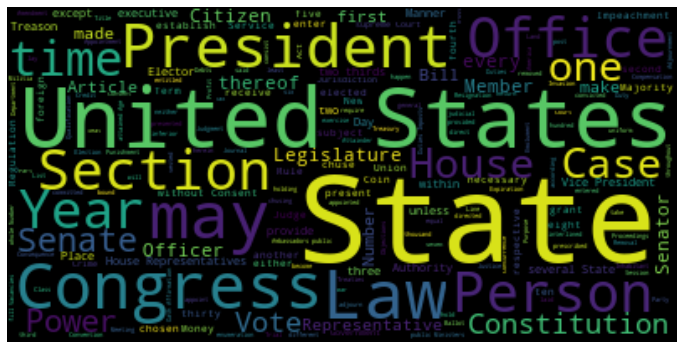

In [21]:
plt.figure(figsize = (12,12))
plt.imshow(wordcloud, interpolation = "bilinear")
plt.axis("off")
plt.show()

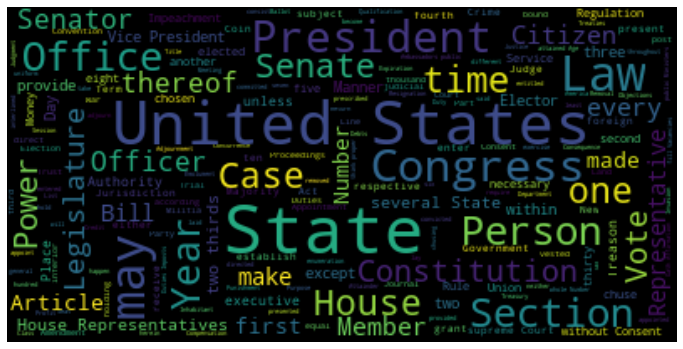

In [22]:
# 단어별 빈도 계산
wordcloud = WordCloud(max_font_size = 40).generate(text)
# max_font_size = 가장 빈도 높은 단어의 글자 크기

plt.figure(figsize = (12,12))
plt.imshow(wordcloud, interpolation = "bilinear")
plt.axis("off")
plt.show()

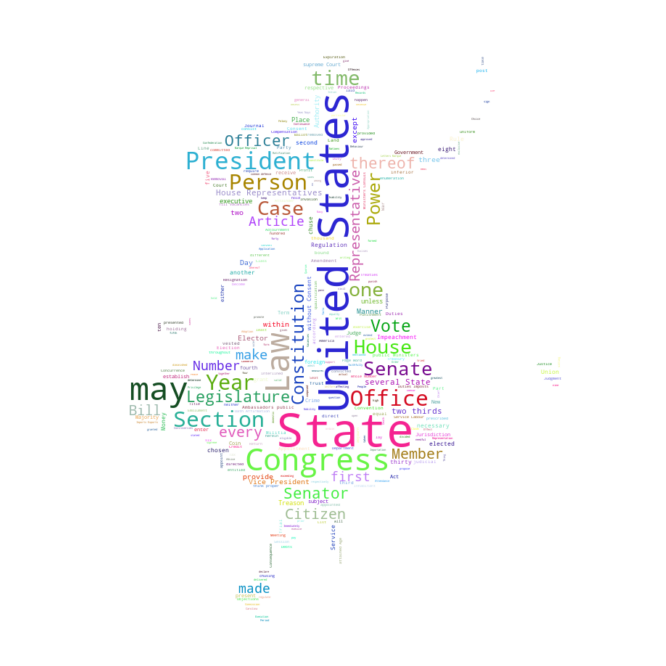

In [29]:
# image mask 적용해서 wordcloud 그리기
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from PIL import Image
from wordcloud import WordCloud
from wordcloud import STOPWORDS

# 이미지 불러오기
alice_mask = np.array(Image.open("C:/Users/Affinity/Desktop/study/Module04/modeule04/ch02/alice_mask.png"))

# 삭제할 단어와 추가
stopwords = set(STOPWORDS)
stopwords.add("said")
# stopwords(불용어) : 관사, 전치사, 조사, 접속사 등 검색 색인 단어로 의미가 없는 단어

# 텍스트 파일 불러오기
text = open("C:/Users/Affinity/Desktop/study/Module04/modeule04/ch02/constitution.txt").read()

# 단어별 빈도 계산(공백으로 분리된 단어)
wordcloud = WordCloud(background_color = "white", max_words = 2000, mask = alice_mask,
                     stopwords = stopwords)
wordcloud = wordcloud.generate(text)

# 색상 함수
r = lambda: np.random.randint(0,255) # color 숫자 임의로 한번씩 뽑음
# color = lombda: (r(), r(), r()) -> 총 3가지 색을 뽑는거임
def wc_color(word, font_size, position, orientation, randomstate = None, **kwargs):
    return (r(), r(), r())
# *args는 여러개의 인자를 받겟다는 뜻 / **kwargs는 ex) 딕셔너리로 받을 수도 있음
# ex) for name in kwargs.key() 이런식

# 워드클라우드 작성
plt.figure(figsize = (12, 12))
plt.imshow(wordcloud.recolor(color_func = wc_color, random_state = 2),
          interpolation = "bilinear")
# interpolation : https://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.imshow
# 이미지의 크기를 변경하는 경우, 변형된 이미지의 픽셀은 추정해서 값을 할당해야합니다
# 보간법 : 알고 있는 데이터 값들을 이용하여 모르는 값을 추정하는 방법의 한 종류
plt.axis("off") # 축 제거
plt.show()

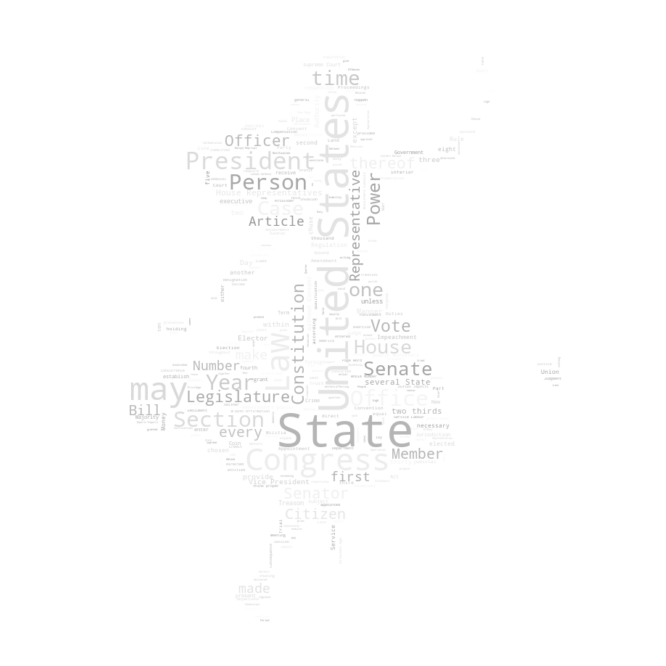

In [49]:
# 흑백 grey color로 만들기
def grey_color_func(word, font_size, position, orientation, random_state = None,
                   **kwargs):
    return 'hsl(0, 0%%, %d%%)' % np.random.randint(60, 100)

plt.figure(figsize = (12, 12))
plt.imshow(wordcloud.recolor(color_func = grey_color_func, random_state = 2),
          interpolation = "bilinear")
plt.axis("off")
plt.show()

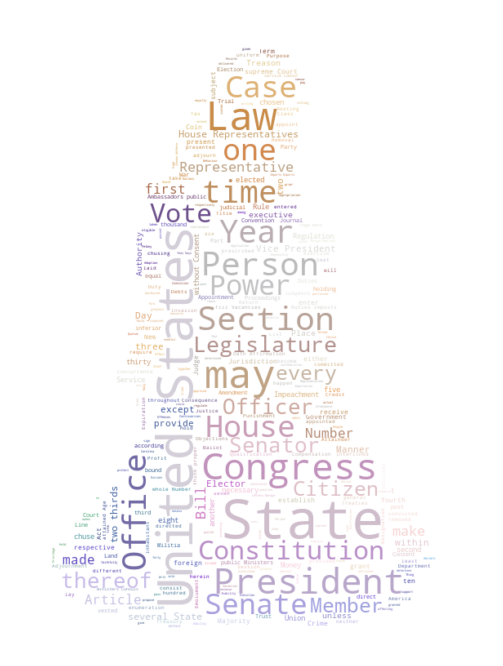

In [50]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from PIL import Image

from wordcloud import WordCloud
from wordcloud import STOPWORDS
from wordcloud import ImageColorGenerator # 이미지에서 색 추출

# 이미지 불러오기
alice_color = np.array(Image.open("C:/Users/Affinity/Desktop/study/Module04/modeule04/ch02/alice_color.png"))
image_colors = ImageColorGenerator(alice_color) # 이미지에서 색 추출

# 삭제할 단어와 추가
stopwords = set(STOPWORDS)
stopwords.add("said")

# 텍스트 파일 불러오기
text = open("C:/Users/Affinity/Desktop/study/Module04/modeule04/ch02/constitution.txt").read()

# 단어별 빈도 계산(공백으로 분리된 단어)
wordcloud = WordCloud(background_color = "white", max_words = 2000, mask = alice_color,
                     stopwords = stopwords)
wordcloud = wordcloud.generate(text)

# 워드클라우드 작성
plt.figure(figsize = (12, 12))
plt.imshow(wordcloud.recolor(color_func = image_colors), interpolation = "bilinear")
plt.axis("off")
plt.show()

##### 한글 워드클라우드 p.804

ko_con_text: ﻿존경하는 국민 여러분, 안녕하십니까. 그리고 기자 여러분 반갑습니다.
새해 좋은 계획들 세우셨습니까, 새해에는 소망하시는 일 모두 다 잘 이루시길 바랍니다. 
지난해는 국가적으로나 국민 모두에게 매우 어려운 한 해였습니다.
북핵 위기, SK글로벌 사건, 신용불량자 증가, 가계부채 문제, 이라크전쟁, 사스공포, 부안사태 등 정말 어려운 일이 많았습니다.
뿐만 아니라 IMF 외환위기 이후 줄어든 일자리와 크게 벌어진 소득격차는 우리 서민들을 더욱 힘들게 했습니다. 
여기에 불법 대선자금 문제와 제 주변의 이런저런 허물까지 불거져 국민 여러분을 실망스럽게 했습니다.
다시 한번 송구스럽다는 말씀을 드립니다.
그러나 이제 길고 어두웠던 터널도 거의 끝나가는 것 같습니다.
희망의 빛이 보입니다.
아직도 많은 난관이 남아 있기는 하지만 밝은 희망을 향해 한 발 한 발 나아가고 있습니다.
자신감을 가집시다.
자신 있습니다.
지난해 어려운 가운데서도 우리가 이룬 성과들이 적지 않습니다.
전쟁 위기로 치닫던 북핵 위기를 6자회담으로 이끌어서 평화적 해결의 큰 가닥을 잡았습니다.
어떤 일이 있어도 한반도에서 전쟁만은 안 된다는 온 국민의 의지와 정부의 성실한 외교가 일궈낸 값진 성과입니다.
전 세계를 불안하게 했던 이라크전쟁과 사스확산에도 불구하고 우리가 평온을 유지할 수 있었던 것도 국민 여러분과 정부가 합심 협력한 결과입니다.
SK글로벌 사건과 카드채 문제 등 불안했던 금융시장도 큰 충격 없이 한 고비를 넘겼습니다.
서민들께 걱정을 끼쳤던 부동산 투기 열풍도 10.29 부동산대책 이후 안정을 찾았습니다.
특히 우리 기업과 근로자들은 극심했던 내수 불황 속에서도 2천억 달러 가까운 수출실적을 기록하며 우리 경제를 떠받쳤습니다.
참으로 위대한 업적이라 할 수 있을 것입니다.
고통을 참고 협력해주신 국민 여러분께 진심으로 감사드리며, 기업인과 근로자 여러분께도 깊은 경의를 표합니다.
국민 여러분,
올해에는 수출 2천억 달러 시대가 열립니다.
경제의 거울이라

tokens_ko: ['존경', '국민', '여러분', '안녕하십니까', '기자', '여러분', '새해', '계획', '새해', '소망', '일', '모두', '지난해', '국가', '국민', '모두', '매우', '북핵', '위기', '글로벌', '사건', '신용', '불량', '증가', '가계부채', '문제', '이라크전쟁', '사스', '공포', '부안', '사태', '등', '정말', '뿐', '외환위기', '이후', '일자리', '크게', '소득', '격차', '우리', '서민', '더욱', '여기', '불법', '대선', '자금', '문제', '제', '주변', '허물', '국민', '여러분', '실망', '다시', '한번', '송구', '말씀', '이제', '터널', '거의', '것', '희망', '빛', '난관', '남아', '희망', '향', '발', '발', '자신감', '자신', '지난해', '가운데', '서도', '우리', '성과', '적지', '전쟁', '위기', '북핵', '위기', '자', '회담', '평화', '해결', '가닥', '한반도', '전쟁', '안', '온', '국민', '의지', '정부', '외교', '성과', '전', '세계', '이라크전쟁', '사스', '확산', '불구', '우리', '평온', '유지', '수', '것', '국민', '여러분', '정부', '합심', '협력', '결과', '글로벌', '사건', '카드', '채', '문제', '등', '금융시장', '충격', '고비', '서민', '걱정', '부동산', '투기', '열풍', '부동산대책', '이후', '안정', '우리', '기업', '근로자', '수', '불황', '속', '달러', '수출', '실적', '기록', '우리', '경제', '참으로', '업적', '수', '것', '고통', '참고', '협력', '국민', '여러분', '진심', '감사', '기업인', '근로자', '여러분', '도', '경의', '표', '국민', '여러분', '올해', 

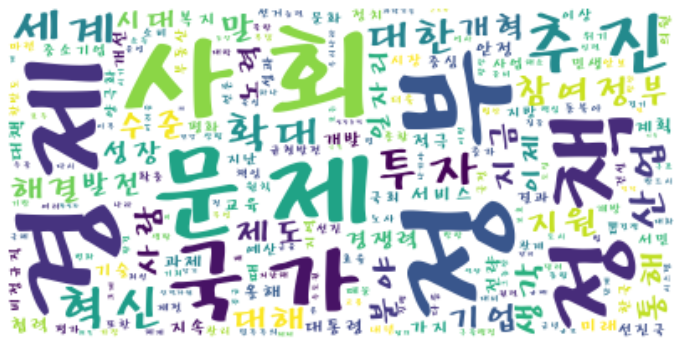

In [52]:
import nltk
from konlpy.corpus import kolaw
from konlpy.tag import Okt
import matplotlib.pyplot as plt
%matplotlib inline
from PIL import Image
from wordcloud import WordCloud
from wordcloud import ImageColorGenerator # 이미지에서 색 추출

t = Okt()

# 텍스트 파일 불러오기
ko_con_text = open("C:/Users/Affinity/Desktop/study/Module04/modeule04/ch02/speech.txt",
                  encoding = 'UTF8').read()

print("ko_con_text:",ko_con_text,'\n')

# 명사 추출
tokens_ko = t.nouns(ko_con_text)
print("tokens_ko:", tokens_ko)

# 단어 삭제
stop_words = []
f = open("C:/Users/Affinity/Desktop/study/Module04/modeule04/ch02/stop_word.txt",
        encoding = 'UTF8')
lines = f.readlines()
for x in lines:
    stop_words.append(x.strip()) # 줄바꿈 문자 지움
print("stop_words", stop_words, '\n')
tokens_ko = [each_word for each_word in tokens_ko if each_word not in stop_words]
print("tokens_ko", tokens_ko)

sel_word = nltk.Text(tokens_ko) # 한국어를 유니코드로해서 읽을 수 있게 해줌
data = sel_word.vocab().most_common(1000) # 빈도 높은거부터 1000개 출력
tmp_data = dict(data)

# 단어별 빈도 계산(공백으로 분리된 단어)
wordcloud = WordCloud(font_path = "C:/Windows/Fonts/HYBDAM.ttf",
                     background_color = "white")
wordcloud = wordcloud.generate_from_frequencies(tmp_data)

# 워드클라우드 작성
plt.figure(figsize = (12,12))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis("off")
plt.show()

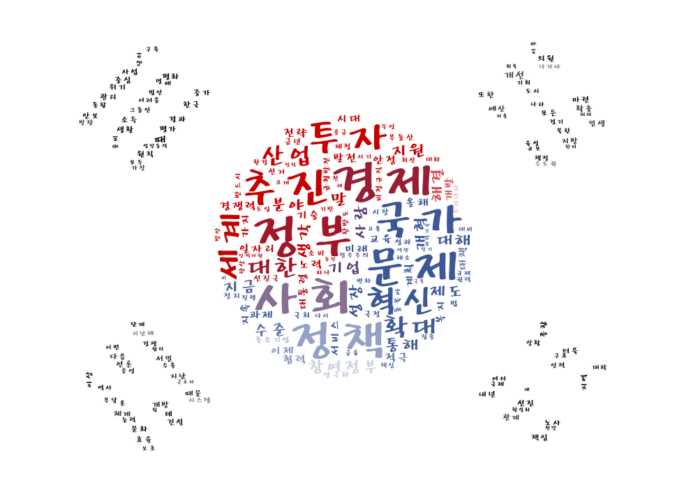

In [54]:
# 이미지 불러오기
# korea_color = np.array(Image.open("C:/Users/Affinity/Desktop/study/Module04/modeule04/ch02/south-korea-flag.png"))
# image_colors = ImageColorGenerator(korea_color) # 이미지에서 색 추출
korea_color = np.array(Image.open(
"C:/Users/Affinity/Desktop/study/Module04/modeule04/ch02/south-korea-flag.png"))
image_colors = ImageColorGenerator(korea_color)

# 단어별 빈도 계산(공백으로 분리된 단어)
wordcloud = WordCloud(font_path = "C:/Windows/Fonts/HYBDAM.ttf", relative_scaling = 0.2,
                     mask = korea_color, background_color = "white",
                     min_font_size = 1, max_font_size = 80)
wordcloud = wordcloud.generate_from_frequencies(tmp_data)

# 워드클라우드 작성
plt.figure(figsize = (12,12))
# plt.imshow(korea_color, interpolation = 'bilinear')
plt.imshow(wordcloud.recolor(color_func = image_colors), interpolation = 'bilinear')
plt.axis('off')
plt.show()

#### Word2Vec p.807 (품사까지 분석)

In [56]:
import codecs
from bs4 import BeautifulSoup
from konlpy.tag import Twitter
from gensim.models import word2vec

# utf-16 인코딩으로 파일을 열고 글자를 출력하기
fp = codecs.open("C:/Users/Affinity/Desktop/study/Module04/modeule04/ch02/BEXX0003.txt",
                "r", encoding = 'UTF16')
soup = BeautifulSoup(fp, 'html.parser')
body = soup.select_one('body > text')
text = body.getText()

# 텍스트를 한 줄씩 처리하기
twitter = Twitter()
results = []
lines = text.split("\r\n")
for line in lines:
    # 형태소 분석하기
    # 단어의 기본형 사용
    malist = twitter.pos(line, norm = True, stem = True)
    r = []
    for word in malist:
        # 어미/조사/구두점 등은 대상에서 제외
        if not word[1] in ["Josa", "Eomi", "Punctuation"]:
            r.append(word[0])
    rl = (" ".join(r)).strip()
    results.append(rl)
    print(rl)
    
# 파일로 출력하기
wakati_file = 'toji.wakati'
with open(wakati_file, 'w', encoding = 'UTF8') as fp:
    fp.write('\n'.join(results))
    
# Word2Vec 모델 만들기
data = word2vec.LineSentence(wakati_file) # 텍스트 읽어 들이기
model = word2vec.Word2Vec(data, size=200, window=10, hs=1, min_count=2, sg=1) # 모델 생성
model.save("C:/Users/Affinity/Desktop/study/Module04/modeule04/ch02/toji.model")
print("ok")

C:\ProgramData\Anaconda3\envs\mypython\lib\site-packages\konlpy\tag\_okt.py:16: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


제 1 편 어둠 발 소리 
 서다 序 
 1897년 의 한가위 
 까치 들 울타리 안 감나무 오다 아침 인사 하다 전 무색 옷 댕기 꼬리 늘 아이 들 송편 입 물 마을 길 쏘다 기쁘다 날뛰다 어른 들 해 중천 좀 기울어지다 무렵 이 래야 차례 치르다 하다 성묘 하다 하다 이웃 끼리 음식 나누다 보다 한나절 넘다 이 때 타 작 마당 사람 들 모 이기 시작 들뜨다 시작 남정 노인 들 아낙 들 채비 아무래도 더디다 그렇다 수 없다 것 식구 들 시중 음식 간수 끝내다 제 자신 치장 남아 있다 이 바람 고개 무겁다 벼 이삭 황금 빛 물결 이루다 들판 마음 놓다 새 떼 들 모여들다 풍 성하다 향연 벌이다 
 후우 이이 이 놈 새 떼 들 극성 새 쫓다 할망구 와삭 와삭 풀발 선 출입 옷 갈아입다 타 작 마당 굿 보고 있다 것 추석 마을 남녀 노유 사람 들 뿐 아니다 강아지 돼지 소나 말 새 들 시궁창 드나들다 쥐 새끼 포식 날인 보다 
 빠르다 장단 꽹과리 소리 느리다 장단 둔중하다 여음 울리다 징 소리 타 작 마당 거리 멀다 최 참판 댁 사랑 흐느낌 슬프다 들려오다 농부 들 지금 꽃 달리다 고깔 흔들다 신명 내다 괴롭다 하다 일상 日常 잊다 굿 놀이 열중 있다 것 최 참판 댁 섭섭찮 전곡 錢穀 이 나가다 풍년 미치다 못 하다 실하다 평작 임 틀림 없다 것 모처럼 허리 끈 풀다 쌀밥 식구 들 배 두드리다 테 하루 근심 잊다 만 하다 것 
 이 날 수 수 개비 꺾다 아이 들 매 맞다 않다 여러 달 솟다 증 素症 풀다 느긋하다 늙은이 들 뒷간 출입 잦다 힘 좋다 젊은이 들 벌써 읍내 가다 없다 황소 하다 마리 끌 돌아오다 꿈 꾸미다 읍내 씨름판 몰리다 간 것 
 최 참판 댁 사랑 무인 지경 적막하다 햇빛 맑다 뜰 비치다 사람 들 모두 어디 가버리다 새롭다 바르다 방문 장지 낯설다 
 한동안 타 작 마당 굿 놀이 멎다 것 같다 별안간 경 풍 들리다 것 꽹과리 악 쓴다 빠르다 드높다 꽹과리 따르다 징 소리 빨르다 깨깽 깨애깽 덥다 응응 음 깨깽 깨애깽 덥다 응응 음 장구 북 사이

C:\ProgramData\Anaconda3\envs\mypython\lib\site-packages\gensim\models\base_any2vec.py:743: UserWarning: C extension not loaded, training will be slow. Install a C compiler and reinstall gensim for fast training.
  "C extension not loaded, training will be slow. "
C:\ProgramData\Anaconda3\envs\mypython\lib\site-packages\smart_open\smart_open_lib.py:398: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


ok


C:\ProgramData\Anaconda3\envs\mypython\lib\site-packages\smart_open\smart_open_lib.py:398: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


In [57]:
# train set을 토대로 만든 모형 (단어별 유사도 거리 기준)
model = word2vec.Word2Vec.load(
"C:/Users/Affinity/Desktop/study/Module04/modeule04/ch02/toji.model")
model.most_similar("땅") # 입력한 단어와 유사한 단어
# 실제로는 "각 땅마다"의 "각" 같은 경우 의미가 없기 때문에 지워준다

C:\ProgramData\Anaconda3\envs\mypython\lib\site-packages\smart_open\smart_open_lib.py:398: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL
C:\ProgramData\Anaconda3\envs\mypython\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  after removing the cwd from sys.path.


[('각', 0.885947585105896),
 ('조상', 0.8830325603485107),
 ('벼슬길', 0.8764084577560425),
 ('작정', 0.8699415922164917),
 ('봉사', 0.86993008852005),
 ('원귀', 0.8668938875198364),
 ('기생', 0.8652163743972778),
 ('바르다', 0.8646748065948486),
 ('맡다', 0.8614934682846069),
 ('홈', 0.8607510328292847)]

In [58]:
model.similarity("땅", "조상") # 두 단어 사이의 유사도

C:\ProgramData\Anaconda3\envs\mypython\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `similarity` (Method will be removed in 4.0.0, use self.wv.similarity() instead).
  """Entry point for launching an IPython kernel.


0.8830327

In [59]:
# (땅 + 조상 - 젊은이) 선형결과
model.most_similar(positive = ["땅", "조상"], negative = ["젊은이"], topn=2)
# 땅,조상과는 가까우면서 젊은이와는 거리가 먼 단어를 찾아준다

C:\ProgramData\Anaconda3\envs\mypython\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  


[('종년', 0.8008162379264832), ('이녁', 0.797873854637146)]

##### 베이즈 정리로 텍스트 분류하기 p.810

In [67]:
import math, sys
from konlpy.tag import Twitter

class BayesianFilter:
    """베이지안 필터"""
    def __init__(self):
        self.words = set() # 출현한 단어 기록
        self.word_dict = {} # 카테고리마다의 출현 횟수 기록
        self.category_dict = {} # 카테고리 출현 횟수 기록

    # 형태소 분석하기 -----------------------------(1)
    def split(self, text):
        results = []
        twitter = Twitter()
        # 단어의 기본형 사용
        malist = twitter.pos(text, norm = True, stem = True)
        for word in malist:
            # 어미/조사/구두점 등은 대상에서 제외
            if not word[1] in ["Josa", "Eomi", "Punctuation"]:
                results.append(word[0])
        return results
    # 단어와 카테고리의 출현 횟수 세기 ----------------(2)
    def inc_word(self, word, category):
        # 단어를 카테고리에 추가하기
        if not category in self.word_dict:
            self.word_dict[category] = {}
        if not word in self.word_dict[category]:
            self.word_dict[category][word] = 0
        self.word_dict[category][word] += 1
        self.words.add(word)
        
    def inc_category(self, category):
        # 카테고리 계산하기
        if not category in self.category_dict:
            self.category_dict[category] = 0
        self.category_dict[category] += 1
        
    # 텍스트 학습하기 -------------------------------(3)
    def fit(self, text, category):
        """텍스트 학습"""
        word_list = self.split(text)
        for word in word_list:
            self.inc_word(word, category)
        self.inc_category(category)
        
    # 단어 리스트에 점수 매기기 -----------------------(4)
    def score(self, words, category):
        score = math.log(self.category_prob(category))
        for word in words:
            score += math.log(self.word_prob(word, category))
            # 확률이라 곱해야하지만 소수점이 길어질 경우 잘리기 때문에 log를 취한 후 더함
        return score
    
    # 예측하기 --------------------------------------(5)
    def predict(self, text):
        best_category = None # 초기값을 None으로 시작
        max_score = -sys.maxsize # -이므로 아주 작은 값이 나옴 (확률을 0으로 준 느낌)
        # 확률이 처음 나왔을 때 얘보다는 크게 나올거니까 일부러 초기값을 이렇게 지정해줌
        # 두번째는 첫번째값과 비교해서 분류 -> 이런식이므로 초기값을 -로 크게 지정
        words = self.split(text)
        score_list = []
        for category in self.category_dict.keys(): # category별 확률
            score = self.score(words, category)
            score_list.append((category, score))
            if score > max_score: # 첫번째는 무조건 저장됨
                max_score = score
                best_category = category
        return best_category, score_list
        
    # 카테고리 내부의 단어 출현 횟수 구하기
    def get_word_count(self, word, category):
        if word in self.word_dict[category]:
            return self.word_dict[category][word]
        else:
            return 0
            
    # 카테고리 계산
    def category_prob(self, category):
        sum_categories = sum(self.category_dict.values())
        category_v = self.category_dict[category] # 카탈로그의 빈도수
        return category_v / sum_categories
        
    # 카테고리 내부의 단어 출현 비율 계산 ---------------(6)
    def word_prob(self, word, category):
        n = self.get_word_count(word, category) + 1 # 라플라스 추정값 대입
        d = sum(self.word_dict[category].values())
        return n / d

In [68]:
# "bayes.py" 불러오기 -> 그냥 위에꺼 실행하면 됨
# from bayes import BayesianFilter
bf = BayesianFilter()

# 텍스트 학습
bf.fit("파격 세일 - 오늘까지만 30% 할인", "광고")
bf.fit("쿠폰 선물 & 무료 배송", "광고")
bf.fit("현데계 백화점 세일", "광고")
bf.fit("봄과 함께 찾아온 따뜻한 신제품 소식", "광고")
bf.fit("인기 제품 기간 한정 세일", "광고")
bf.fit("오늘 일정 확인", "중요")
bf.fit("프로젝트 진행 상황 보고", "중요")
bf.fit("계약 잘 부탁드립니다.", "중요")
bf.fit("회의 일정이 등록되었습니다.", "중요")
bf.fit("오늘 일정이 없습니다.", "중요")

# 예츠
pre, scorelist = bf.predict("재고 정리 할인, 무료 배송")
print("결과 =", pre)
print(scorelist)

결과 = 중요
[('광고', -15.274728189756129), ('중요', -14.859213900841024)]
